<a href="https://colab.research.google.com/github/sreevalsanb/Datascience-projects/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

###There are more than a million application which are available in google playstore.This dataset contain data of 10,000 apps from google playstore.
###Dataset Content
###The dataset contain following features:


1.   App-Name of the apps.
2.   Category-Category under which the app falls.
3.   Rating-Applications rating in playstore.
4.   Recviews-Number of reviews given to apps.
5.   Size-Size of the apps.
6.   Installs-Number of installs of the apps.
7.   Type-If the app is free or paid.
8.   Price-Price of the apps.
9.   Content Rating-Appropriate target audience of the apps.
10.  Genres-Genres under which the app fall.
11.  Last updated-Date when the app last updated.
12.  Current Ver-Current version of the apps.
13.  Android Ver-Minimum android version required for the apps to run.





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from datetime import datetime
from datetime import date

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### I will start by importing the csv file into pandas dataframe called df_apps.  

In [3]:
path='/content/drive/MyDrive/capstone/'

In [4]:
df_apps=pd.read_csv(path + 'Copy of Play Store Data.csv')

In [5]:
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df_apps.shape

(10841, 13)

In [7]:
df_apps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### From the dataset information we know that there is only one feature with numeric type(Rating). Now lets analyse specifically Rating column by boxplot.






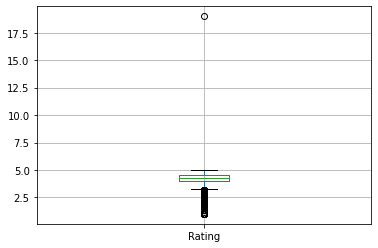

In [9]:
df_apps.boxplot()

#### From the above boxplot we get to know that almost all rating are laying between 3.5 to 4.5 and we can also observe an outlier which is plotted near 19.

#### Next we want to clean our dataset by replacing the Null value.


## **Data** **cleaning**

In [10]:
df_apps.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df_apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### From the above, we understand that exept for Rating columns, we are having a good dataset.

#### As we have seen an outlier in Rating column from the above boxplot, i would like to remove all the outlier from the Rating column.

In [12]:
df_apps[df_apps.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### Now we can see that only one row have Rating above 5 and we can see that, this row have some error in the Installs column also, so we will drop this row from our dataset.

In [13]:
df_apps.drop([10472],inplace=True)

#### Now we will check wheather the row is droped or not by slicing the index from 10470 to 10475 of our dataset.

In [14]:
df_apps[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


Now the row number 10472 is removed from the dataset and we will plot the boxplot.

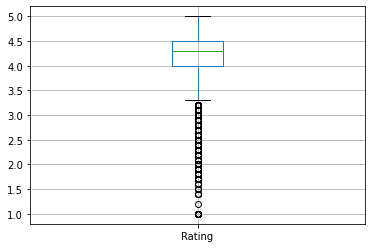

In [15]:
df_apps.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce7d976910>]],
      dtype=object)

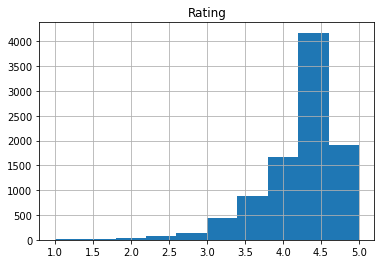

In [16]:
df_apps.hist()

#### From the above histogram we can see that it is right skewed.
#### So the numeric features are replaced by median and all the categorical features are replaced with mode.
#### Then we will replace different signs with space and covert them into numerical values.

In [17]:
def input_median(column):
  return column.fillna(column.median())

In [18]:
df_apps['Rating']=df_apps['Rating'].transform(input_median)

In [19]:
df_apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [20]:
print(df_apps['Type'].mode())
print(df_apps['Current Ver'].mode())
print(df_apps['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [21]:
df_apps['Type'].fillna(str(df_apps['Type'].mode().values[0]),inplace=True)
df_apps['Current Ver'].fillna(str(df_apps['Type'].mode().values[0]),inplace=True)
df_apps['Android Ver'].fillna(str(df_apps['Type'].mode().values[0]),inplace=True)

In [22]:
df_apps['Price']=df_apps['Price'].apply(lambda x:str(x).replace('$',' ')  if '$' in str(x) else str(x))
df_apps['Price']=df_apps['Price'].apply(lambda x:float(x))
df_apps['Reviews']=pd.to_numeric(df_apps['Reviews'],errors='coerce')
df_apps['Installs']=df_apps['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df_apps['Installs']=df_apps['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df_apps['Installs']=df_apps['Installs'].apply(lambda x: float(x))

In [23]:
df_apps.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


# **Grouping**

In [24]:
grouping=df_apps.groupby('Category')

In [25]:
group_rating=grouping.Rating.mean()
group_review=grouping.Reviews.mean()
group_Price=grouping.Price.mean()

In [26]:
print(group_rating)
print(group_Price)
print(group_review)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

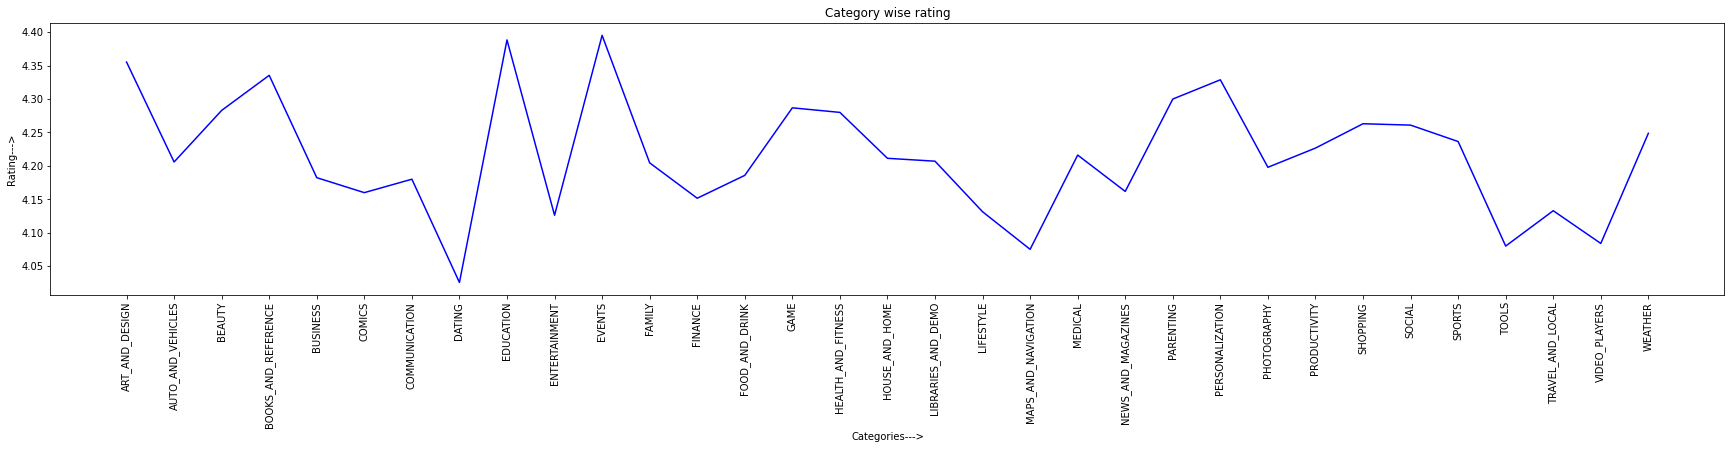

In [27]:
plt.figure(figsize=(30,5))
plt.plot(group_rating,color='b')
plt.xticks(rotation=90)
plt.title('Category wise rating')
plt.xlabel('Categories--->')
plt.ylabel('Rating--->')
plt.show()

#### A line plot of average rating of each category of App.
#### Rating is highest for educational category apps and events category apps.
#### Rating is low for dating category apps

In [28]:
df_apps['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [29]:
group_install=grouping.Installs.mean()

Text(0, 0.5, 'Installs--->')

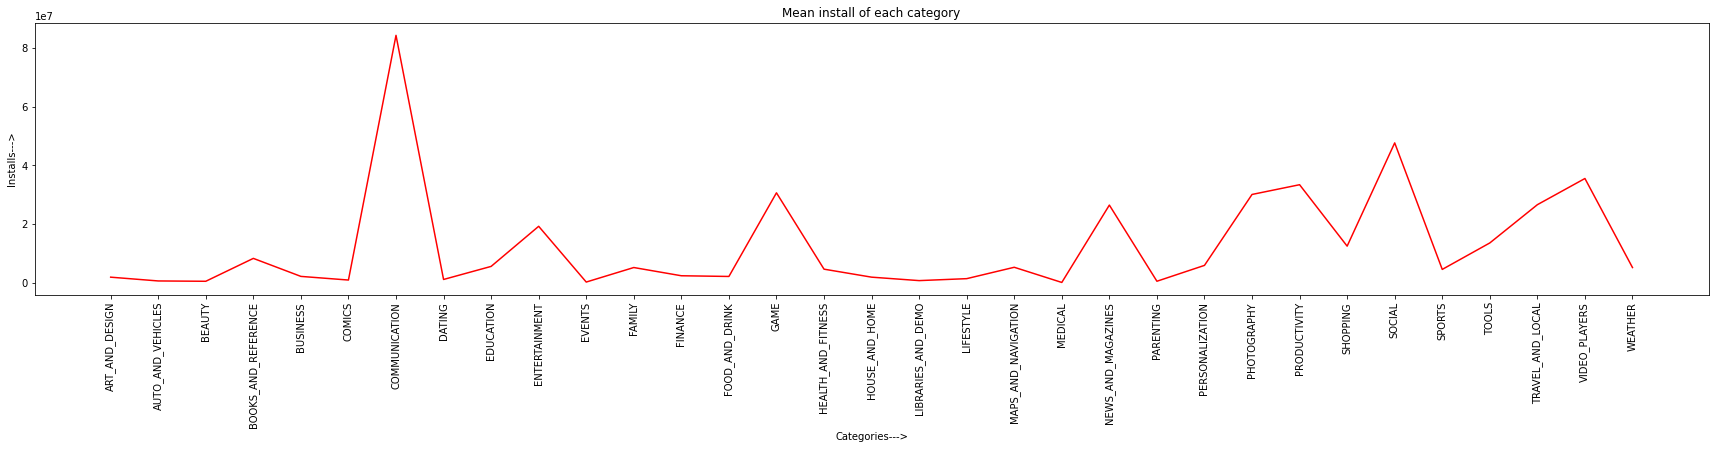

In [30]:
plt.figure(figsize=(30,5))
plt.plot(group_install,color='r')
plt.xticks(rotation=90)
plt.title('Mean install of each category')
plt.xlabel('Categories--->')
plt.ylabel('Installs--->')

####This line plot shows mean install of different app categories.
####The average installs is higher for communication category apps followed by social category apps.
####The average  installation is low for categories such as beauty, comics, dating, events, medical and parenting.
####Even though the average rating is quite high for event category but the mean install is quite low.

In [31]:
df_apps['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [32]:
x=df_apps['Genres'].value_counts().reset_index()[:10]
x.rename(columns={'index':'Genres','Genres':'Index'},inplace=True)
y=df_apps['Genres'].value_counts().reset_index()[:10]
y.rename(columns={'index':'Genres','Genres':'Index'},inplace=True)



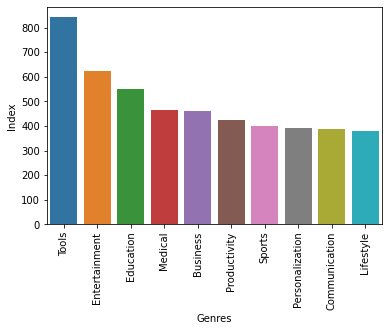

In [33]:
fig=sns.barplot(x=x['Genres'],y=y['Index']);
plt.xticks(rotation=90);

####This bar plot shows the count of top 10 genres of apps.
####Tools genre have the highest count followed by Entertainment.  

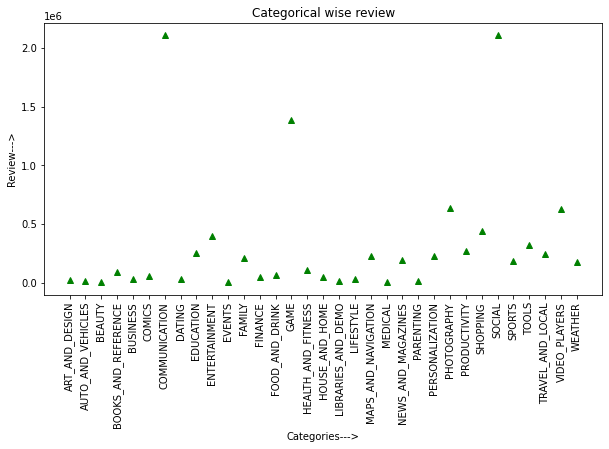

In [34]:
plt.figure(figsize=(10,5))
plt.plot(group_review,'g^',color='g')
plt.xticks(rotation=90)
plt.title('Categorical wise review')
plt.xlabel('Categories--->')
plt.ylabel('Review--->')
plt.show()

####This scatter plot shows the average count of the number of reviews for each category of apps.
####Most user reviewed communication and social category apps.


In [35]:
df_apps['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [36]:
free_apps=len(df_apps[df_apps['Type']=='Free'])
print(free_apps)
paid_apps=len(df_apps[df_apps['Type']=='Paid'])
print(paid_apps)

10040
800


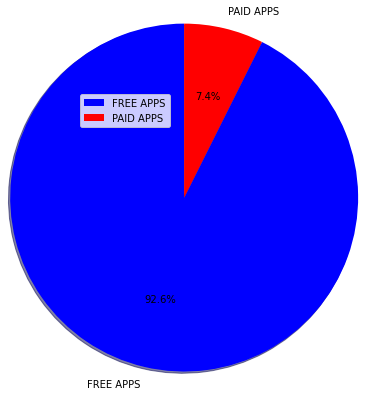

In [37]:
cost_of_apps=['FREE APPS','PAID APPS']
count_of_apps=[10040,800]
colors=['b','r']
plt.pie(count_of_apps,labels=cost_of_apps, colors=colors,shadow=True, startangle=90, radius=2,autopct = '%1.1f%%')
plt.legend()
plt.show()

####This pie chart shows the percentage of Free and Paid apps in the dataset.
####Most of the apps in the dataset are Free type.

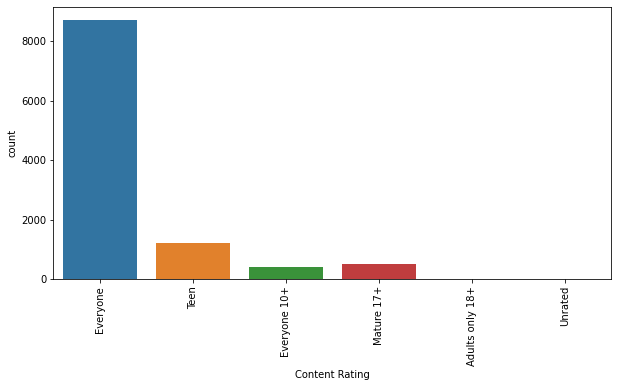

In [38]:

plt.figure(figsize=(10,5))
sns.countplot(df_apps['Content Rating'])
plt.xticks(rotation=90)
plt.show()

#### This bar plot shows the count of different age category of target audience.


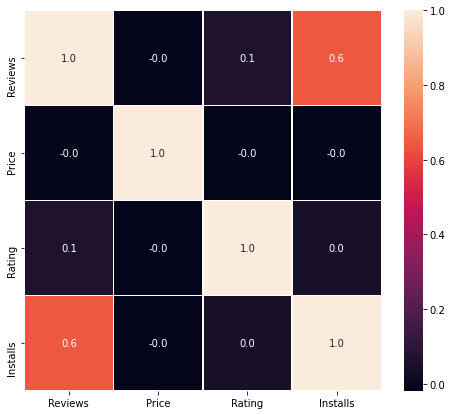

In [48]:
fig,ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(df_apps[["Reviews","Price","Rating","Installs"]].corr(), annot=True,linewidths=.5,fmt='.1f')
plt.show()

####From the heat map we can see that the corelatiom between various features are nearly 0, which indicate that almost all features are independent of each other.
####We can see that there is a corelation between installs and reviews, which indiacte that the number of installs is infuenced by review.

In [40]:
def play_store_apps_updated_year(year):
  upd_year=year[-4:]
  if (upd_year=='2010'):
    updated_year=upd_year 
  elif (upd_year=='2011'):
    updated_year=upd_year 
  elif (upd_year=='2012'):
    updated_year=upd_year     
  elif (upd_year=='2013'):
    updated_year=upd_year 
  elif (upd_year=='2014'):
    updated_year=upd_year 
  elif (upd_year=='2015'):
    updated_year=upd_year 
  elif (upd_year=='2016'):
    updated_year=upd_year 
  elif (upd_year=='2017'):
    updated_year=upd_year 
  elif (upd_year=='2018'):
    updated_year=upd_year 
  elif (upd_year=='2019'):
    updated_year=upd_year 
  elif (upd_year=='2020'):
    updated_year=upd_year 
  else:
    updated_year="unavailabe"
  return updated_year    


        

In [41]:
df_apps['updated by year']=df_apps['Last Updated'].apply(play_store_apps_updated_year)

In [42]:
df_apps['updated by year'].unique()

array(['2018', '2017', '2014', '2016', '2015', '2013', '2012', '2011',
       '2010'], dtype=object)

In [43]:
df_apps['updated by year']=df_apps['updated by year'].apply(lambda x:int(x) )

In [44]:
df_apps['updated by year'].value_counts()

2018    7349
2017    1867
2016     804
2015     459
2014     209
2013     110
2012      26
2011      15
2010       1
Name: updated by year, dtype: int64

In [45]:
ser=df_apps['updated by year'].value_counts()
print(ser)

2018    7349
2017    1867
2016     804
2015     459
2014     209
2013     110
2012      26
2011      15
2010       1
Name: updated by year, dtype: int64


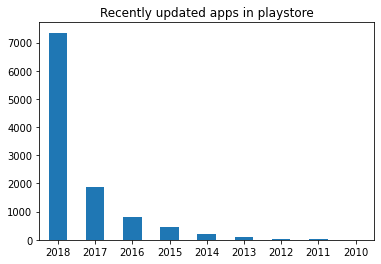

In [46]:

ser.plot.bar(x='Years', y='Number of apps',title='Recently updated apps in playstore',rot=0)
plt.show(block=True);

####This bar plot shows the count of recently updated app in the playstore.
####More the 7000 apps are currently updated.
####We can see that less than 1000 apps are not updated after 2014.


#**Conclusion**
From this we can analyze that installation and reviews are related, as the review average count increase, installation is also more.so app owners should encourage to write review for their app.

Rating is also another factor that affect the install of apps, so owners should try to update the content of apps as per the review and feedback and improve the rating.

Most of the apps are downloaded by teens, so users of other age category, must also be encouraged to install the apps.

If the app is free, rather than paid, installation increases.

Most of the people are engaged in social medias and communication category apps,so bringing new social media apps with advance features will bring a boom in market.